# Boosting with ADABOOST

In [3]:
%%HTML
<video width="600" height="400" controls>
  <source src="04_1.mp4" type="video/mp4">
</video>


Discovered by Freund and Schapire in 1996.

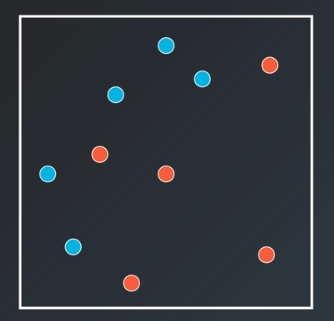

- We fit our first learner in order to maximize accuracy, or equivalently, minimize the number of errors. There are a few good ones, but one can check that we can do no better than three errors.

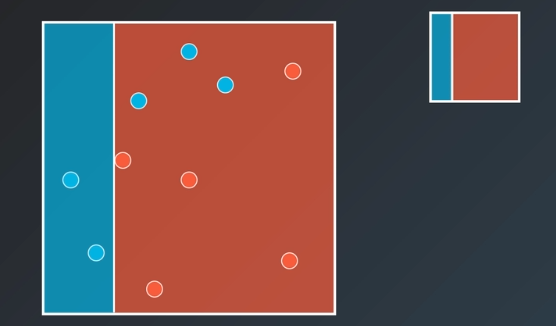

- The second learner needs to fix the mistakes that the first one has made. We take the misclassified points and make them bigger. In other words, we'll punish the model more if it misses these points. So, the next weak learner needs to focus on these more.
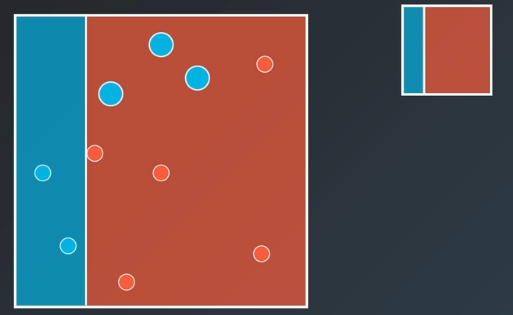
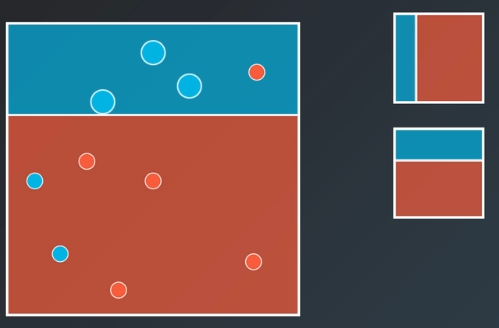
- Now again, we punish the points that are misclassified by the second learner by enlarging those points.
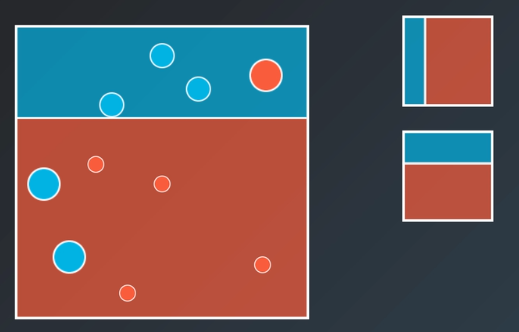

- Our third weak learner tries really hard to correctly classify the big points. We could keep going, but let's say three is enough.
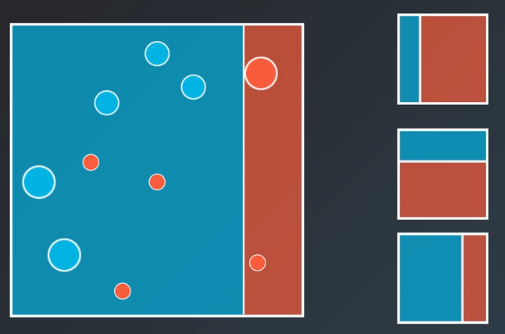
Now, we want to combine the three models we found. I'll be more specific about combining them later, but for now, let's imagine that we're making them vote like before.
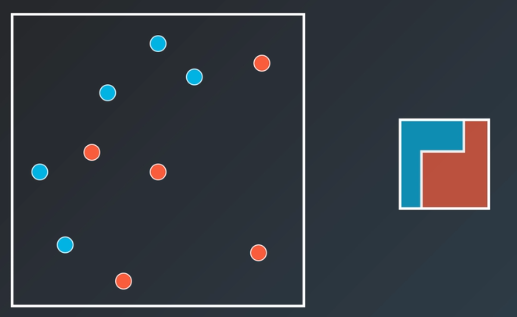
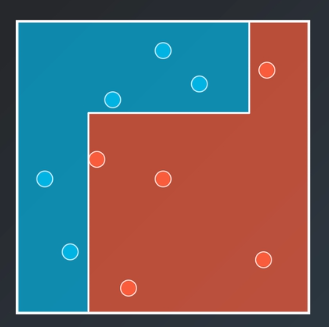

# Weighting the Data

In [4]:
%%HTML
<video width="600" height="400" controls>
  <source src="04_2.mp4" type="video/mp4">
</video>

### let's fit our first Learner.

Before we wanted to minimize the number of errors. Now we want to minimize the sum of weights of the incorrectly classified points which as of now is the same. 

If we add the weights of the correctly classified points, we get a 7 and 3 for the incorrectly classified points.

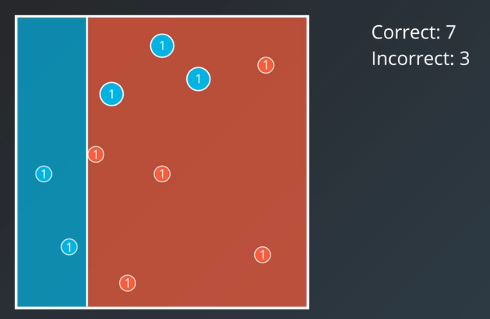

let's make it enough to have this model be a 50-50 model. 

So, if we take these three points and weight them by a factor of 7/3 or 2.33, our model now has 7 as the sum of the weights of the correctly classified points and also 7 as the sum of the weights of the incorrectly classified points. 

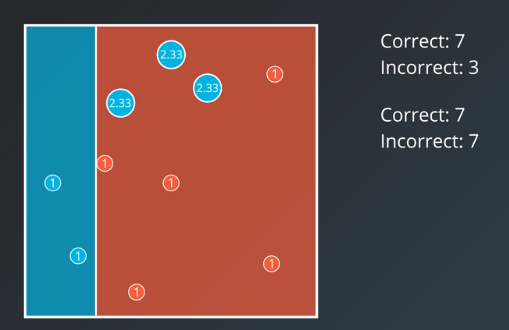

So, this model now is lame, and we need a second one.

### second learner

Our second model will be this one that fits the newly weighted data best.
For this one, we can see that if we add the weights of the correctly classified points, we get 11, and for the incorrectly classified ones, we get 3.
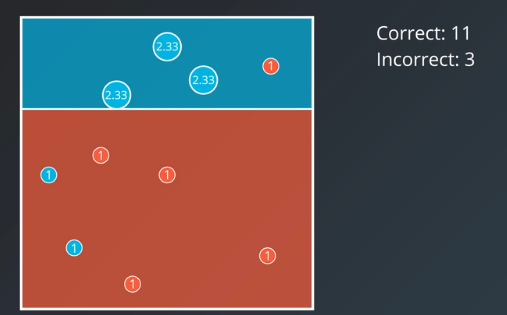
again. So, let's weigh the incorrectly classified points. By how much? Well, enough to make this model a 50-50 model again. 

Notice that if we weigh these three errors each by a factor of 11/3 or 3.66, the sum of the weights of the incorrectly classified points is 11. 

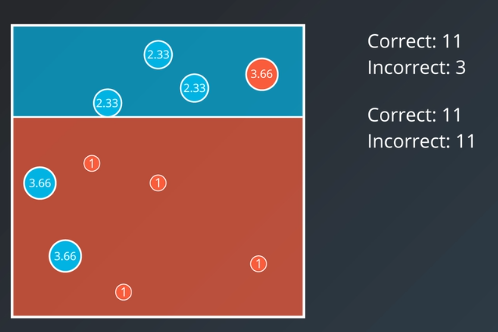

So, our model is just a 50-50 model again. That's lame. Let's fit a third model in this newly weighted data.

### third learner

it's 19 and still 3 for the incorrect ones.

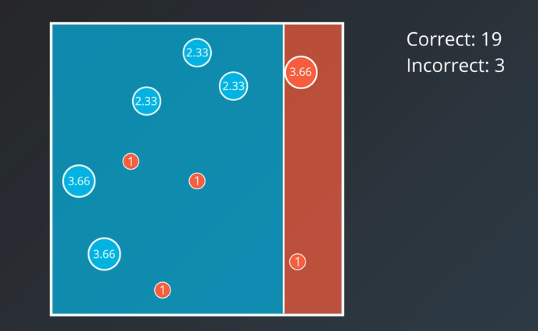

# Weighting the Models


In [5]:
%%HTML
<video width="600" height="400" controls>
  <source src="04_3.mp4" type="video/mp4">
</video>

The formula for the weight can also be written as $ln\bigg({\frac {accuracy} {1-accuracy}}\bigg)$

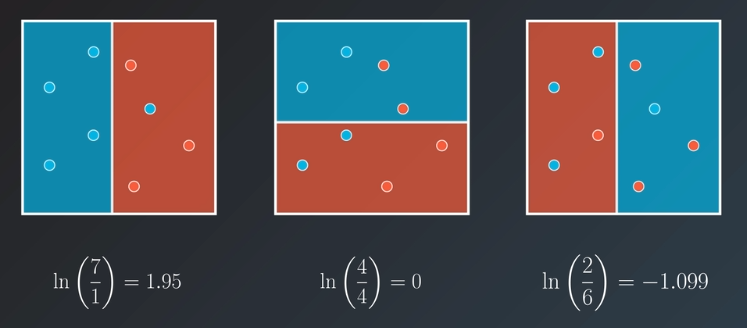

what about these two models?

- The first one has weight $ln({\frac 8 0})=?$ since it makes no mistakes.
- Even worse, the second one has a weight $ln({\frac 0 8})=ln(0)$ which is undefined as well.

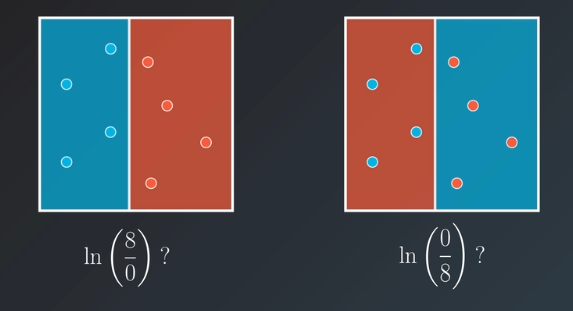

We can think of 8/0 as infinity. So, the first one has weight infinity. 

For the second one, we can think of the ln(0)ln(0) as negative infinity.

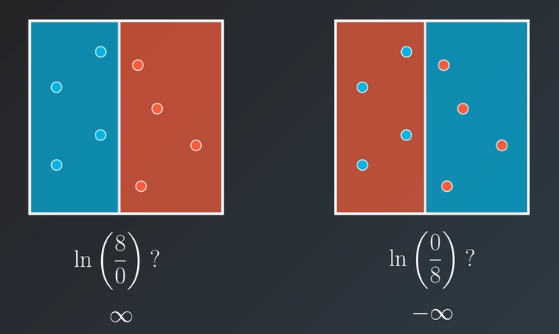

If one of our weak learners classifies the data perfectly then we're done, 

If one of our weak learners manages to get everything wrong then doing the complete opposite already classifies our data well. 

# Combining the Models

In the first one, the sum of weights of the correctly classified points is 7, and the sum of incorrect ones is 3. 

Therefore, the weight is a $ln({\frac 7 3})=0.84$

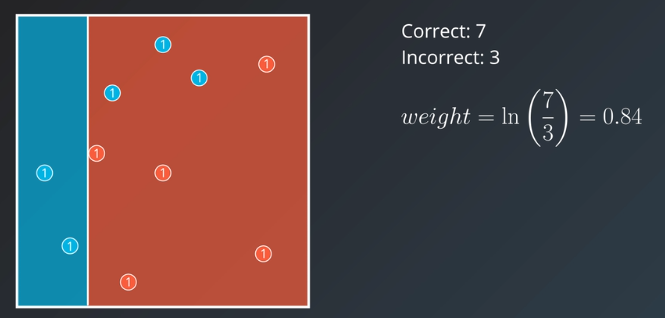

For the second one, the sum of weights of the correctly classified points is 11 and for the incorrect ones, it's 3. 

So, the weight is $ln({\frac {11} 3})=1.3$

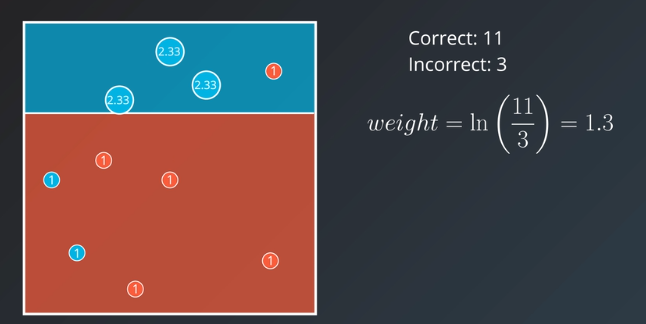


Finally, for the third one, the sum of correct weights is 19 and for the incorrect ones, it's 3 again.

So, the weight is $ln({\frac {19} 3})=1.84$

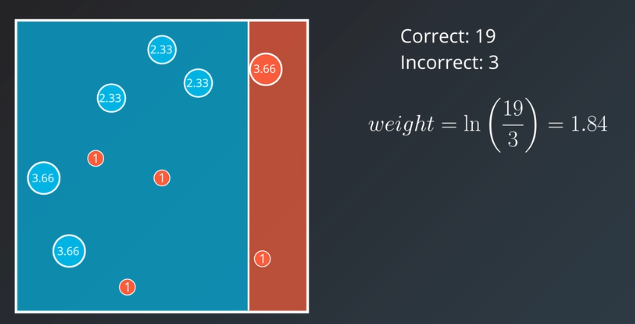

### Combining values
- For the positive area, we'll add the weight
- For the negative area, we'll subtract the weight

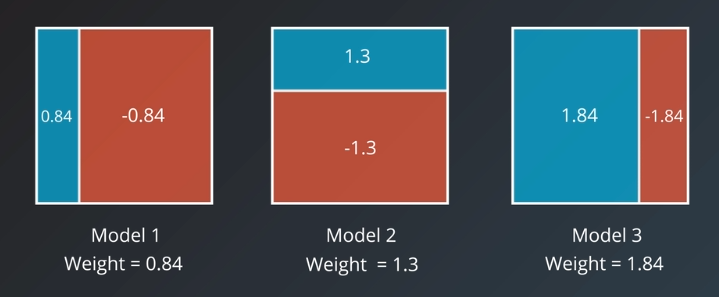
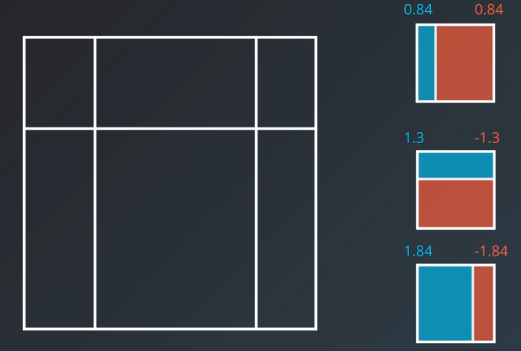
We take the first model and add the positives and negatives of the weight to each region. 
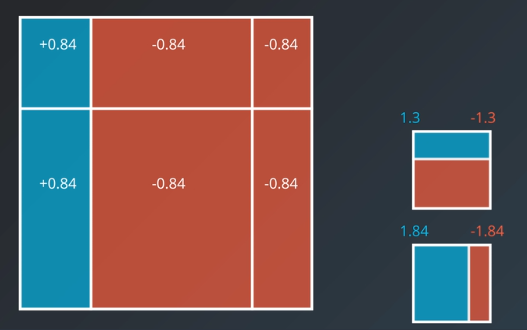
Then, we do the same thing with the second model and finally, with the third model.
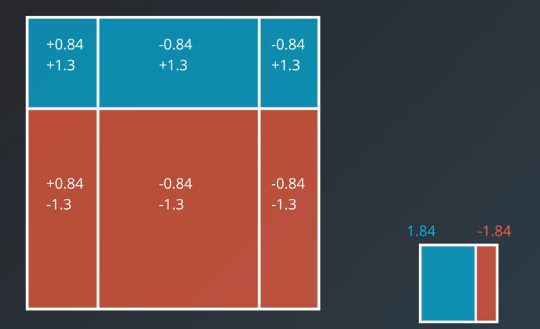
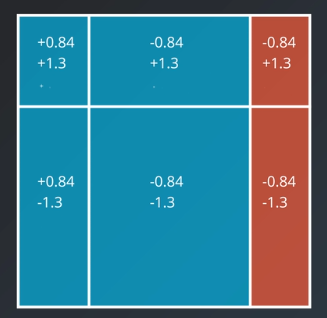
When the value is positive, then we say blue, and when it is negative, we say red.
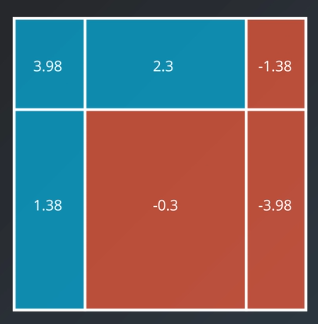

# Three friends

- One always tells the truth
- Another one tells the truth half of the time and lies half of the time, and we don't know which half
- The third one always lies.

Friend one and three are very useful, but two is useless.

We'll assign the truthful model a large positive weight, the random model weight of zero since it's useless, and the liar model a large negative weight since we'll do the exact opposite as this model says.

### The math behind this

Let's look at the accuracy :

- The truthful model has accuracy around one
- The random model has an accuracy of around 50 percent
- The liar model has accurate around zero.

So this function will help us check it out: $  y=ln({\frac x {1 - x}})$ where x is the accuracy.

- first one, it's very negative for values of x close to 0
- second one, it's close to 0 for values around .5 (for example, for 0.5 it's $ln({\frac {0.5} {0.5}}) = ln(1) =0$ 
- third one, it's very positive for values of x close to 1.

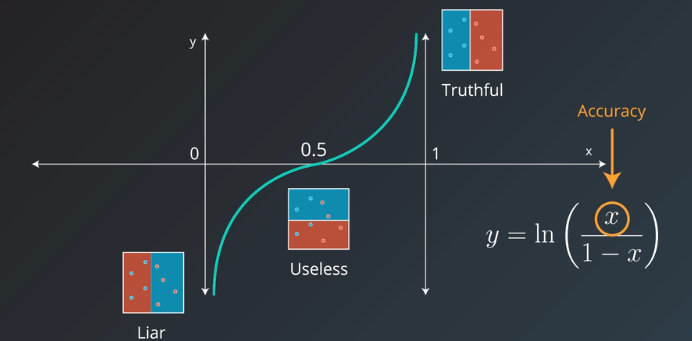